In [ ]:
import pandas as pd

# Load the uploaded dataset
file_path = '/content/eeg_parkinson_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows and basic information about the dataset
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15100 entries, 0 to 15099
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            15100 non-null  int64  
 1   Target                         15100 non-null  int64  
 2   Raw_Signal_Mean                15100 non-null  float64
 3   Magnitude_Mean                 15100 non-null  float64
 4   Phase_Mean                     15100 non-null  float64
 5   Gender_Male                    15100 non-null  bool   
 6   Clinical_Stage_Stage 2         15100 non-null  bool   
 7   Clinical_Stage_Stage 3         15100 non-null  bool   
 8   Clinical_Stage_Stage 4         15100 non-null  bool   
 9   Clinical_Stage_Stage 5         15100 non-null  bool   
 10  Condition_Label_On-Medication  15100 non-null  bool   
 11  Condition_Label_Rest Tremor    15100 non-null  bool   
 12  Condition_Label_Rigidity       15100 non-null 

(   Age  Target  Raw_Signal_Mean  Magnitude_Mean  Phase_Mean  Gender_Male  \
 0   57       3         0.001308        0.025417    0.052668        False   
 1   76       1         0.001788        0.024581    0.036751         True   
 2   50       1         0.000671        0.024573    0.018569        False   
 3   77       2         0.003779        0.024392    0.052041         True   
 4   67       2         0.001008        0.024249    0.049647         True   
 
    Clinical_Stage_Stage 2  Clinical_Stage_Stage 3  Clinical_Stage_Stage 4  \
 0                   False                    True                   False   
 1                   False                   False                   False   
 2                   False                   False                   False   
 3                   False                    True                   False   
 4                   False                    True                   False   
 
    Clinical_Stage_Stage 5  Condition_Label_On-Medication  \
 0   

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 1.4690 - mae: 0.9812 - val_loss: 0.3426 - val_mae: 0.3121
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3298 - mae: 0.3031 - val_loss: 0.2773 - val_mae: 0.2782
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2675 - mae: 0.2694 - val_loss: 0.1918 - val_mae: 0.2029
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1889 - mae: 0.2071 - val_loss: 0.1325 - val_mae: 0.1282
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1477 - mae: 0.1701 - val_loss: 0.1079 - val_mae: 0.1101
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1203 - mae: 0.1431 - val_loss: 0.0959 - val_mae: 0.1117
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1090 - mae: 0.1481 - val_loss: 0.0788 - val_mae: 0.0901
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0931 - mae: 0.1359 - val_loss: 0.0701 - val_mae: 0.0860
Epoch 9/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0827 - mae:

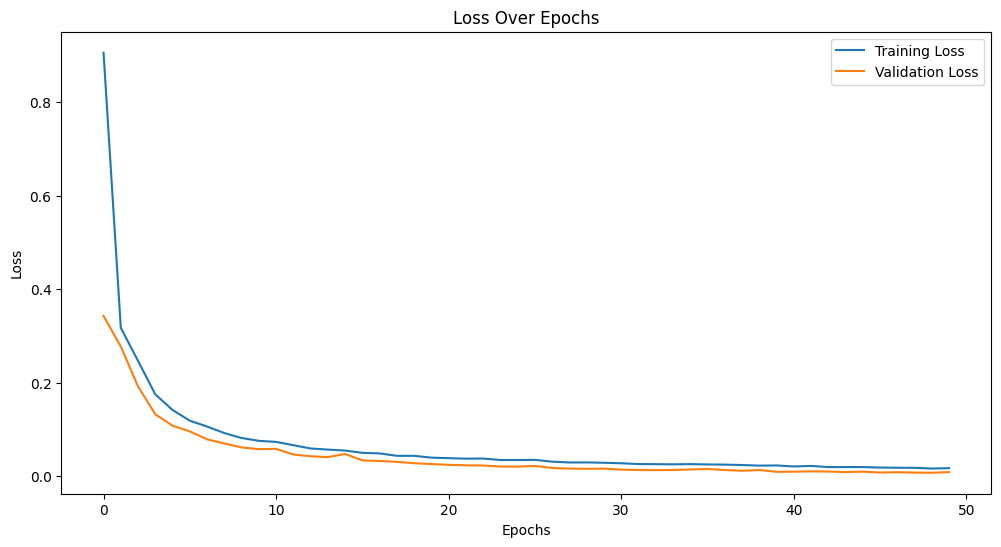

Cross-Validation Losses: [0.3436591625213623, 0.29722440242767334, 0.3286944627761841, 0.33444055914878845, 0.31552645564079285]
Cross-Validation MAEs: [0.33086153864860535, 0.26765677332878113, 0.3013233244419098, 0.3036101758480072, 0.29713064432144165]
Average Cross-Validation Loss: 0.3239090085029602
Average Cross-Validation MAE: 0.30011649131774903


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# Step 1: Load the Dataset
file_path = '/content/eeg_parkinson_data.csv'  # Update with the path to your dataset in Colab
data = pd.read_csv(file_path)

# Step 2: Preprocess the Dataset
# Normalize numeric columns
numeric_columns = ['Age', 'Raw_Signal_Mean', 'Magnitude_Mean', 'Phase_Mean']
scaler = MinMaxScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Convert boolean columns to numeric (0/1)
boolean_columns = [col for col in data.columns if data[col].dtype == 'bool']
data[boolean_columns] = data[boolean_columns].astype(int)

# Prepare features (X) and target (y)
X = data.drop(columns=['Target']).values  # Features
y = data['Target'].values                 # Target

# Reshape X into a time-series format
timesteps = 10
num_samples = len(X) // timesteps  # Ensure data is divisible by timesteps
X = X[:num_samples * timesteps].reshape(num_samples, timesteps, -1)
y = y[:num_samples * timesteps].reshape(num_samples, timesteps).mean(axis=1)  # Aggregate target per sequence

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Define the LSTM Model with Regularization and Dropout
model = Sequential()

# Add LSTM layer with L2 regularization
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]),
               kernel_regularizer=l2(0.01)))  # L2 regularization

# Add Dropout layer to reduce overfitting
model.add(Dropout(0.2))  # 20% of neurons will be dropped

# Add Dense output layer
model.add(Dense(1))  # Output layer for regression (single value prediction)

# Step 5: Compile the Model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Step 6: Add Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Step 7: Train the Model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,  # Reserve 20% of the training set for validation
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the Model
loss, mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {loss}")
print(f"Test MAE: {mae}")


# Step 9: (Optional) Plot Training History
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 10: Cross-Validation (Optional)
# Perform KFold cross-validation to better evaluate model generalization

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_losses, cv_maes = [], []

for train_idx, val_idx in kf.split(X):
    X_train_cv, X_val_cv = X[train_idx], X[val_idx]
    y_train_cv, y_val_cv = y[train_idx], y[val_idx]

    # Rebuild the model for each fold
    model_cv = Sequential()
    model_cv.add(LSTM(50, input_shape=(X_train_cv.shape[1], X_train_cv.shape[2]), kernel_regularizer=l2(0.01)))
    model_cv.add(Dropout(0.2))
    model_cv.add(Dense(1))

    model_cv.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

    # Train the model
    model_cv.fit(X_train_cv, y_train_cv, epochs=50, batch_size=32, verbose=0, validation_data=(X_val_cv, y_val_cv), callbacks=[early_stopping])

    # Evaluate the model
    val_loss, val_mae = model_cv.evaluate(X_val_cv, y_val_cv, verbose=0)
    cv_losses.append(val_loss)
    cv_maes.append(val_mae)

# Print Cross-Validation results
print(f"Cross-Validation Losses: {cv_losses}")
print(f"Cross-Validation MAEs: {cv_maes}")
print(f"Average Cross-Validation Loss: {np.mean(cv_losses)}")
print(f"Average Cross-Validation MAE: {np.mean(cv_maes)}")


In [ ]:
# Assuming you have already trained your model (e.g., `model.fit(X_train, y_train)`)

# Predict on the training set
y_train_pred = model.predict(X_train)

# Predict on the test set
y_test_pred = model.predict(X_test)

# Calculate performance metrics for both sets (e.g., Mean Absolute Error, R² Score)
from sklearn.metrics import mean_absolute_error, r2_score

# Train performance
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Test performance
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the results
print(f"Training MAE: {train_mae}")
print(f"Training R²: {train_r2}")
print(f"Test MAE: {test_mae}")
print(f"Test R²: {test_r2}")

# Check if there's a significant performance gap between training and test data
if train_r2 > test_r2:
    print("Potential overfitting: The model performs much better on the training data.")
else:
    print("No signs of overfitting: The model generalizes well to the test data.")


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Training MAE: 0.02086410395159627
Training R²: 0.9944844956547213
Test MAE: 0.02126845812165974
Test R²: 0.9949647315277826
No signs of overfitting: The model generalizes well to the test data.


In [ ]:
import joblib
from tensorflow.keras.models import load_model

# Save the scaler
scaler_path = 'scaler_parkinsons.pkl'
joblib.dump(scaler, scaler_path)
print(f"Scaler saved to {scaler_path}")

# Save the model
model_path = 'lstm_model_parkinsons.h5'
model.save(model_path)
print(f"Model saved to {model_path}")


Scaler saved to scaler_parkinsons.pkl
Model saved to lstm_model_parkinsons.h5


In [1]:
!pip install dash


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 14.9 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [2]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output, State
import plotly.graph_objs as go
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from collections import deque
import joblib

# Load pre-trained LSTM model
model = tf.keras.models.load_model("/content/lstm_park_model.h5")  # Replace with the actual path
scaler = joblib.load("/content/scaler_parkinson.pkl")  # Load the scaler used for feature scaling

# Initialize Dash app
app = dash.Dash(__name__)
app.title = "Parkinson's Prediction Dashboard"

# Initialize rolling data buffers for real-time prediction visualization
time_window = 50
time_series = deque(maxlen=time_window)
prediction_probabilities = deque(maxlen=time_window)
labels = deque(maxlen=time_window)

# Fill with initial data
for i in range(time_window):
    time_series.append(i)
    prediction_probabilities.append(0.5)  # Neutral probability
    labels.append("Low Risk")

# App layout
app.layout = html.Div([
    html.H1("Parkinson's Prediction Dashboard", style={'text-align': 'center', 'color': 'white'}),

    # Prediction visualization
    html.Div([
        html.H3("Real-Time Parkinson's Risk Prediction", style={'color': 'white'}),
        dcc.Graph(id="real-time-prediction", style={'height': '40vh'}),
        html.Div([
            html.Div("Current Risk Level:", style={'font-size': '20px', 'color': 'white'}),
            html.Div(id="current-risk", style={
                'font-size': '30px',
                'text-align': 'center',
                'padding': '10px',
                'color': 'white',
                'background-color': 'gray',
                'border-radius': '10px',
                'margin-top': '10px'
            })
        ], style={'text-align': 'center'})
    ]),

    # Data upload for predictions
    html.Div([
        html.H3("Upload Test Data for Predictions", style={'color': 'white'}),
        dcc.Upload(
            id="upload-data",
            children=html.Div(["Drag and Drop or ", html.A("Select Files")]),
            style={
                'width': '100%',
                'height': '60px',
                'lineHeight': '60px',
                'borderWidth': '1px',
                'borderStyle': 'dashed',
                'borderRadius': '5px',
                'textAlign': 'center',
                'margin': '10px'
            },
            multiple=False
        ),
        html.Div(id="upload-status", style={'margin-top': '10px', 'text-align': 'center', 'color': 'white'})
    ]),

    # Real-time updates
    dcc.Interval(id="update-interval", interval=2000, n_intervals=0)  # Every 2 seconds
])

# Callback to update real-time predictions
@app.callback(
    [Output("real-time-prediction", "figure"),
     Output("current-risk", "children"),
     Output("current-risk", "style")],
    [Input("update-interval", "n_intervals")]
)
def update_real_time_predictions(n):
    # Generate synthetic real-time data for visualization
    num_features = model.input_shape[-1] * model.input_shape[1]
    test_data = np.random.uniform(-1, 1, size=(1, num_features))
    test_data = test_data.reshape(1, model.input_shape[1], model.input_shape[2])


    prob = model.predict(test_data)[0][0]
    risk_level = "High Risk" if prob > 0.5 else "Low Risk"

    # Update buffers
    time_series.append(time_series[-1] + 1)
    prediction_probabilities.append(prob)
    labels.append(risk_level)

    # Color map for risk level
    risk_color = "red" if risk_level == "High Risk" else "green"

    # Create real-time prediction figure
    prediction_figure = {
        "data": [
            go.Scatter(
                x=list(time_series),
                y=list(prediction_probabilities),
                mode="lines",
                name="Risk Probability",
                line=dict(color="white")  # Set line color to white
            )
        ],
        "layout": go.Layout(
            title="Real-Time Prediction",
            xaxis={"title": "Time", 'color': 'white'},
            yaxis={"title": "Probability of Parkinson's Risk", 'color': 'white'},
            yaxis_range=[0, 1],
            plot_bgcolor='black',  # Set plot background to black
            paper_bgcolor='black',  # Set the entire background to black
            font=dict(color='white'),  # Set font color to white
            showlegend=True
        )
    }

    # Update risk style
    risk_style = {
        'font-size': '30px',
        'text-align': 'center',
        'padding': '10px',
        'color': 'white',
        'background-color': risk_color,
        'border-radius': '10px',
        'margin-top': '10px'
    }

    return prediction_figure, risk_level, risk_style

# Callback to handle uploaded data
@app.callback(
    Output("upload-status", "children"),
    [Input("upload-data", "contents")],
    [State("upload-data", "filename"), State("upload-data", "last_modified")]
)
def handle_uploaded_data(contents, filename, last_modified):
    if contents is None:
        return "No file uploaded yet."

    # Process uploaded data (for simplicity, this example doesn't process files)
    return f"File '{filename}' uploaded successfully!"

# Run the app
if __name__ == "__main__":
    app.run_server(debug=True)


<IPython.core.display.Javascript object>